In [1]:
!cd Data/challenge

In [8]:
!bzcat Data/challenge/bookings.csv.bz2 | head -10001 > bookings.sample.csv 


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = Data/challenge/bookings.csv.bz2, output file = (stdout)


In [9]:
!bzcat Data/challenge/searches.csv.bz2 | head -10001 > searches.sample.csv 


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = Data/challenge/searches.csv.bz2, output file = (stdout)


In [11]:
!cat bookings.sample.csv | head -1

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
cat: write error: Broken pipe


In [27]:
# Contar lineas
!bzcat Data/challenge/bookings.csv.bz2 | wc -l

10000011


In [1]:
import numpy as np
import pandas as pd

In [14]:
bookings_sample = pd.read_csv("Data/challenge/bookings.csv.bz2", sep="^", header=0, nrows=10001)

In [15]:
bookings_sample.head(10)

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546
5,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,DENLGA,FK,W,Y,2013-04-07 10:23:00,2013-04-07 16:14:24,1,2013,3,NULL
6,2013-03-20 00:00:00,1V,US,0283592e45e392871f7e14b1e22a9aaf,2d0f8e7e1bb792625d2f34f221bc38f1,d54708298686de200f8270e7c637af5e,2013-03-20 00:00:00,5923,0,DEN,...,LGADEN,FK,K,Y,2013-04-11 11:15:00,2013-04-11 13:06:24,1,2013,3,NULL
7,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,NRTSIN,XR,Q,Y,2013-04-14 11:05:00,2013-04-14 17:10:56,2,2013,3,NULL
8,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,SINPEN,WS,Y,Y,2013-04-16 15:45:00,2013-04-16 17:15:29,2,2013,3,NULL
9,2013-03-25 00:00:00,1V,JP,5af045902bd23cab579915611d99e1e0,5073861d8597467c33596bfe16f23c56,a37584d1485cb35991e4ff1a2ba92262,2013-03-25 00:00:00,8371,60,NRT,...,PENBKK,EQ,Y,Y,2013-04-18 08:00:00,2013-04-18 08:53:56,2,2013,3,NULL


In [16]:
searches_sample = pd.read_csv("Data/challenge/searches.csv.bz2", sep="^", header=0, nrows=10001)

In [17]:
searches_sample.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [18]:
bookings_sample.to_csv("bookings_sample_pandas.csv")

In [25]:
import bz2
from tqdm import tqdm_notebook as tqdm
c = 0

with bz2.open("Data/challenge/bookings.csv.bz2") as f:
    for line in tqdm(f):
        c += 1
print(c)


9037187it [04:00, 24225.71it/s]

10000011


In [22]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 726kB/s ta 0:00:01


In [26]:
! pip show tqdm

Name: tqdm
Version: 4.29.1
Summary: Fast, Extensible Progress Meter
Home-page: https://github.com/tqdm/tqdm
Author: Noam Yorav-Raphael
Author-email: noamraph@gmail.com
License: MPLv2.0, MIT Licences
Location: /home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages
Requires: 
Required-by: 


In [3]:
sample = pd.read_csv("Data/challenge/bookings.csv.bz2", sep="^", header=0, nrows=1001)

In [4]:
sample_2013 = sample[sample["year"] == 2013]

In [5]:
sample_by_arr = sample_2013[["arr_port", "pax"]].groupby(["arr_port"])

In [6]:
sample_by_arr.sum().sort_values("pax", ascending=False).head(10)

,pax
arr_port,
DCA,50
JFK,14
PVG,13
FLL,13
SVO,12
CGK,12
LGA,12
LAS,11
BOS,11


In [19]:
from matplotlib import pyplot as plt

<BarContainer object of 202 artists>

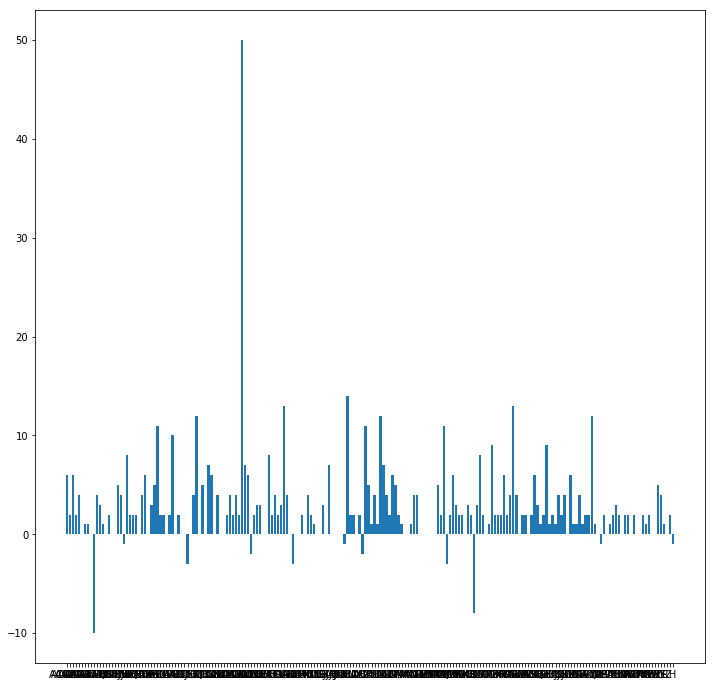

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
ax.bar(sample_by_arr.sum().index, sample_by_arr.sum()["pax"])

In [17]:
sample_by_arr.sum().index

Index(['ACC     ', 'ADD     ', 'AGP     ', 'ALA     ', 'ALC     ', 'ALG     ',
       'AMD     ', 'AMS     ', 'ANC     ', 'ASU     ',
       ...
       'WRO     ', 'YHZ     ', 'YNB     ', 'YUL     ', 'YVR     ', 'YWG     ',
       'YXE     ', 'YYC     ', 'YYZ     ', 'ZRH     '],
      dtype='object', name='arr_port', length=202)

In [2]:
from tqdm import tqdm_notebook as tqdm

In [4]:
c_size = 10000
agg = pd.DataFrame({}, columns=["arr_port","pax"])
for chunk in tqdm(pd.read_csv("Data/challenge/bookings.csv.bz2", sep="^", header=0, chunksize=c_size),
                  total = 10000000/10000):
    chunk_2013 = chunk[chunk["year"] == 2013]
    chunk_by_arr = chunk_2013[["arr_port", "pax"]].groupby(["arr_port"])
    df = pd.DataFrame({"pax": chunk_by_arr.sum()["pax"]}).reset_index()
    agg = agg.append(df)

In [5]:
agg.groupby("arr_port").sum().sort_values("pax", ascending=False).head(10)

,pax
arr_port,
LHR,88809.0
MCO,70930.0
LAX,70530.0
LAS,69630.0
JFK,66270.0
CDG,64490.0
BKK,59460.0
MIA,58150.0
SFO,58000.0


Text(0, 0.5, 'Top 10 airports')

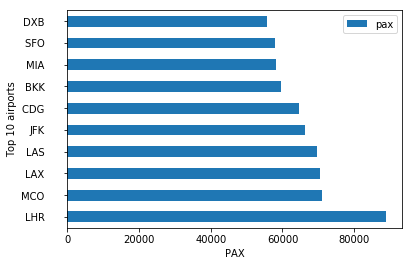

In [23]:
ax = agg.groupby("arr_port").sum().sort_values("pax", ascending=False).head(10).plot(kind="barh")
ax.set_xlabel("PAX")
ax.set_ylabel("Top 10 airports")

In [67]:
chunk = pd.read_csv("Data/challenge/bookings.csv.bz2", sep="^", header=0, nrows=1001)
chunk_2013 = chunk[chunk["year"] == 2013]
chunk_by_arr = chunk_2013[["arr_port", "pax"]].groupby(["arr_port"])
df = pd.DataFrame({"pax": chunk_by_arr.sum()["pax"]}).reset_index()

In [68]:
agg = pd.DataFrame({}, columns=["arr_port","pax"])

In [69]:
agg

,arr_port,pax


In [70]:
agg.append(df)

,arr_port,pax
0,ACC,6
1,ADD,2
2,AGP,6
3,ALA,2
4,ALC,4
5,ALG,0
6,AMD,1
7,AMS,1
8,ANC,0
9,ASU,-10


In [6]:
sample = pd.read_csv("Data/challenge/bookings.csv.bz2", sep="^", header=0, nrows=1001)

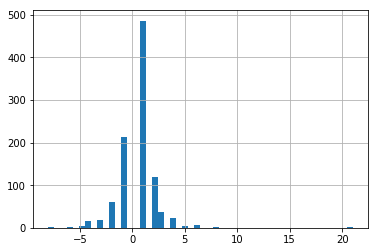

In [9]:
sample["pax"].hist(bins=50)

In [10]:
from matplotlib import pyplot as plt

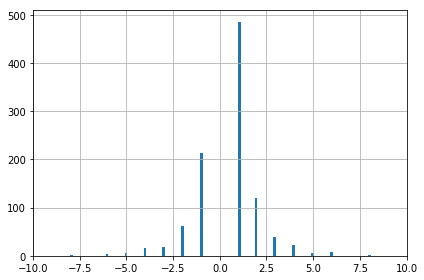

In [11]:
ax = sample["pax"].hist(bins=200)
ax.set_xlim(-10,10)
plt.tight_layout()

In [16]:
sample.isnull().sum(axis=0)

act_date               0
source                 0
pos_ctry               0
pos_iata               0
pos_oid                0
rloc                   0
cre_date               0
duration               0
distance               0
dep_port               0
dep_city               0
dep_ctry               0
arr_port               0
arr_city               0
arr_ctry               0
lst_port               0
lst_city               0
lst_ctry               0
brd_port               0
brd_city               0
brd_ctry               0
off_port               0
off_city               0
off_ctry               0
mkt_port               0
mkt_city               0
mkt_ctry               0
intl                   0
route                  0
carrier                0
bkg_class              0
cab_class              0
brd_time               0
off_time               0
pax                    0
year                   0
month                  0
oid                    0
dtype: int64

In [18]:
sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [19]:
sample['oid      '].value_counts()

NULL         862
BCNI12186     12
KWIKT2260     10
ZRHC22126      9
BDQAK3101      8
DELWI2202      6
VIEL1217E      5
LOSN82572      4
TCII128AH      4
NCEA13100      4
SYDQB28AK      4
GNEBB210C      4
OSLTK2361      4
TLVI32729      4
MIA1S214G      4
PARED38AA      3
SJC1S212D      3
MIARN2100      2
QMZWL2322      2
SYDA82546      2
ATHGR2282      2
PAROP38AW      2
ATL1S2157      2
BOMFL35VD      2
RTMAX2127      2
TYOXM2120      2
CAIC3211G      2
BOMAK3303      2
PWQKZ27AB      2
LONLG38DL      2
PARA128C9      2
STOTL3122      2
VLCBC2215      2
BRUBG2121      2
MILED38EP      2
HRDBE2152      2
LONCR28CA      2
AUHOT3116      2
ULNCC2116      2
JNBZA28AX      2
SIPU23503      1
ATHGR28DF      1
MILIG28AG      1
BCNED38AA      1
SFO1S216B      1
Name: oid      , dtype: int64

In [24]:
sample_searches = pd.read_csv("Data/challenge/searches.csv.bz2", sep="^", header=0, nrows=1001)

In [25]:
sample_searches.describe()

,RoundTrip,NbSegments,IsPublishedForNeg,IsFromInternet,IsFromVista
count,1001.000000,1001.000000,1001.0,1001.0,1001.0
mean,0.698302,1.785215,0.0,0.0,0.0
std,0.459224,0.644066,0.0,0.0,0.0
min,0.000000,1.000000,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.0,0.0
50%,1.000000,2.000000,0.0,0.0,0.0
75%,1.000000,2.000000,0.0,0.0,0.0
max,1.000000,6.000000,0.0,0.0,0.0


In [26]:
sample_searches.head(10)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
5,2013-01-01,22:00:28,MPT,3561a60621de06ab1badc8ca55699ef3,US,IAH,BLR,1,2,IAH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
6,2013-01-01,10:47:14,MPT,d327ca6e35cc6732d4709828327ac7c1,DK,CPH,PAR,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
7,2013-01-01,23:39:49,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,PAR,DUB,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
8,2013-01-01,17:08:46,MPT,c8daef4f8bf73a61aa2c928705f7b82d,ES,DUS,ACE,1,2,DUS,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
9,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ


In [27]:
sample_searches.isnull().sum(axis=0)

Date                   0
Time                   0
TxnCode                0
OfficeID               0
Country                0
Origin                 0
Destination            0
RoundTrip              0
NbSegments             0
Seg1Departure          0
Seg1Arrival            0
Seg1Date               4
Seg1Carrier          627
Seg1BookingCode      921
Seg2Departure        289
Seg2Arrival          289
Seg2Date             293
Seg2Carrier          742
Seg2BookingCode      935
Seg3Departure        965
Seg3Arrival          965
Seg3Date             965
Seg3Carrier          965
Seg3BookingCode      966
Seg4Departure        971
Seg4Arrival          971
Seg4Date             971
Seg4Carrier          971
Seg4BookingCode      972
Seg5Departure        996
Seg5Arrival          996
Seg5Date             996
Seg5Carrier          996
Seg5BookingCode      996
Seg6Departure        998
Seg6Arrival          998
Seg6Date             998
Seg6Carrier          998
Seg6BookingCode      998
From                  11


In [29]:
sample_searches["From"].value_counts()

1ASIWS    657
1ASI      332
1APING      1
Name: From, dtype: int64

In [31]:
searches_by_destination = sample_searches.groupby("Destination")

In [33]:
searches_by_destination.count().reset_index()

,Destination,Date,Time,TxnCode,OfficeID,Country,Origin,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,ABT,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
1,ABX,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
2,ACC,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
3,ACE,3,3,3,3,3,3,3,3,3,...,0,0,0,0,3,3,3,3,3,3
4,ADB,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
5,ADD,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
6,AGP,7,7,7,7,7,7,7,7,7,...,0,0,0,0,7,7,7,7,7,7
7,AGU,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,1
8,AJU,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,2,2,2
9,AKL,2,2,2,2,2,2,2,2,2,...,0,0,0,0,2,2,2,2,2,2


In [79]:
sample_searches = pd.read_csv("Data/challenge/searches.csv.bz2", usecols=["Date", "Destination"],
                              sep="^", header=0, nrows=100001)

In [80]:
sample_searches["Date"] = sample_searches["Date"].apply(lambda x: x[:7])

In [84]:
sample_searches.group

,Date,Destination
81857,2013-03,AJA


In [100]:
s = pd.read_csv("Data/challenge/searches.csv.bz2", usecols=["Date", "Destination"],
                              sep="^", header=0, nrows=1001)

In [101]:
s = s.dropna()

In [102]:
sf = s[s["Destination"].isin(["MAD", "BCN", "AGP"])]

In [103]:
sf["Year-Month"] = sf["Date"].apply(lambda x: x[:7])

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
sf.drop("Date", axis=1, inplace=True)

In [105]:
sf["searches"] = 1

/home/dsc/anaconda3/envs/kschool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
sf = sf.groupby(["Destination", "Year-Month"]).sum()

In [107]:
sf = sf.reset_index().pivot(index="Year-Month", columns="Destination")

In [108]:
sf

searches        
Destination      AGP BCN MAD
Year-Month                  
2013-01            7  26  11

In [ ]:
sample_searches["Month"] = sample.apply(month, axis=1)

In [55]:
sample_searches["Date"][0].month

1

In [57]:
def month(x):
    return x.loc["Date"].month
def year(x):
    return x.loc["Date"].year

sample_searches["Month"] = sample_searches.apply(month, axis=1)
sample_searches["Year"] = sample_searches.apply(year, axis=1)

AttributeError: 'Series' object has no attribute 'month'

In [42]:
!conda list | grep pandas

pandas                    0.23.4           py37h04863e7_0  


In [43]:
type(sample_searches["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
sample_searches["Date"].month

AttributeError: 'Series' object has no attribute 'month'

In [242]:
bookings = pd.read_csv("Data/challenge/bookings.csv.bz2", 
                       sep="^", header=0, nrows=10001)
bookings = bookings.drop_duplicates()

In [243]:
bookings.columns = pd.Series(bookings.columns.values).apply(lambda x: x.strip())

In [244]:
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [245]:
bookings = bookings[["act_date", "dep_port", "arr_port"]]

In [246]:
bookings.head()

,act_date,dep_port,arr_port
0,2013-03-05 00:00:00,ZRH,LHR
1,2013-03-26 00:00:00,SAL,CLT
2,2013-03-26 00:00:00,SAL,CLT
3,2013-03-26 00:00:00,AKL,SVO
4,2013-03-26 00:00:00,AKL,SVO


In [247]:
for col in bookings.columns:
    bookings[col] = bookings[col].apply(lambda x: x.strip())

In [248]:
searches = pd.read_csv("Data/challenge/searches.csv.bz2", 
                       sep="^", header=0, nrows=10001)
searches = searches.drop_duplicates()

In [249]:
bookings["act_date"] = bookings["act_date"].apply(lambda x: x[:10])

In [250]:
bookings.head()

,act_date,dep_port,arr_port
0,2013-03-05,ZRH,LHR
1,2013-03-26,SAL,CLT
2,2013-03-26,SAL,CLT
3,2013-03-26,AKL,SVO
4,2013-03-26,AKL,SVO


In [251]:
searches.columns = pd.Series(searches.columns.values).apply(lambda x: x.strip())

In [252]:
searches = searches[["Date", "Origin", "Destination"]]

In [253]:
for col in searches.columns:
    searches[col] = searches[col].apply(lambda x: x.strip())

In [254]:
searches.head()

,Date,Origin,Destination
0,2013-01-01,TXL,AUH
1,2013-01-01,ATH,MIL
2,2013-01-01,ICT,SFO
3,2013-01-01,RNB,ARN
4,2013-01-01,OSL,MAD


In [234]:
def hay_reserva(x):
    return ((bookings["act_date"] == x["Date"]) & (bookings["dep_port"] == x["Origin"]) & (bookings["arr_port"] == x["Destination"])).any()

In [235]:
searches["hay_reserva"] = searches.apply(hay_reserva, axis=1)

KeyError: ('act_date', 'occurred at index 0')

In [214]:
searches["hay_reserva"].any()

False

In [231]:
columns=["Date", "Origin", "Destination"]
bookings.columns = columns

In [261]:
bookings.columns = ["Date", "dep_port", "arr_port"]

In [267]:
full_table = searches.merge(bookings, left_on=["Date","Origin","Destination"], 
                      right_on=["Date","dep_port","arr_port"], how="inner")

In [269]:
full_table

,Date,Origin,Destination,dep_port,arr_port
